# Table of contents

- Introduction.
- Load data.
- Data Processing.
  - Missing value.
  - Visualization.
   - Numeric feature.
   - Add features.
   - Category feature.
- KMneans.
  - Gender.
  - Age.
  - Official time.
- Kmeans with PCA.
  - Gender.
  - Age.
  - Official time.
- Conclusions.




# Introduction

Tập dữ liệu Boston Marathon gồm thông tin của những vận động viên tham gia cuộc thi.

Sử dụng KMeans để phân nhóm dữ liệu. Sau đó kiểm tra thời gian chạy, giới tính, độ tuổi của các nhóm sau khi sử dụng KMeans.

Sử dụng PCA so sánh kết quả với không sử dụng CPA.

# Load data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt 
import random
from sklearn.decomposition import PCA

In [0]:
data = pd.read_csv('/content/drive/My Drive/ML 5/results.csv')

In [4]:
data.shape

(31984, 21)

Dữ liệu gồm 31984 dòng và 21 cột.

In [5]:
pd.set_option('display.max_columns', 300)
data.head(5)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


Dữ liệu không có gì bất thường.

Mô tả:

Bib: Assigned race number based on qualifying time. "F" could appear for female elites.

Name: Name of runner (Last, First)

Age: Age on race day

Gender: Runner's gender

City: Runner's city of residence

State: Runner's state of residence (if applicable).

Country: Runner's country of residence

ctz: Runner's nationality (optional)

5K: Runner's time at 5k

10K: Runner's time at 10k

20K: Runner's time at 20k

Half: Runner's time at halfway point

25K: Runner's time at 25k

30K: Runner's time at 30k

35K: Runner's time at 35k

40K: Runner's time at 40k

Pace: Runner's overall minute per mile pace

Official Time: Runner's official finishing time

Overall: Runner's overall raking

genderdiv: Runner's ranking in their gender

Division: Runner's ranking in their age division

Data types:

Các dữ liệu dạng số: 5k, 10k, 20k, 25k, 30K, 35K, 40K, half, age, official, overall, pace, genderdiv, Division.

Các dữ liệu category: name, gender, bib, ctz, state, country, city.

# Data Processing

Loại bỏ cột name vì nó không ảnh hưởng đến clustering.

In [0]:
data.drop(columns=['name'], inplace=True)

###  Missing value

In [7]:
data.isnull().sum()*100/len(data)

10k           0.000000
division      0.000000
25k           0.000000
gender        0.000000
age           0.000000
official      0.000000
bib           0.000000
genderdiv     0.000000
ctz          96.110555
35k           0.000000
overall       0.000000
pace          0.000000
state         8.054027
30k           0.000000
5k            0.000000
half          0.000000
20k           0.000000
country       0.000000
city          0.003127
40k           0.000000
dtype: float64

ctz chứa tỷ lệ missing value lớn(trên 96%) nên sẽ loại bỏ cột này.

số lượng hàng chứa missing value nhỏ nên sẽ loại bỏ những hàng chứa missing value.


In [0]:
data.drop(columns=['ctz'], inplace=True)

In [0]:
cols = ['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half']
for col in cols:
	data[col] = pd.to_numeric(data[col], errors='coerce')

In [0]:
columns_numb = ['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half', 'age', 'official',
      'overall', 'pace', 'genderdiv', 'division']
columns_categories = ['gender', 'bib', 'state', 'country', 'city']

In [0]:
for col in data.columns:
  data.drop(data[data[col].isnull()].index, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29103 entries, 9 to 31983
Data columns (total 19 columns):
10k          29103 non-null float64
division     29103 non-null int64
25k          29103 non-null float64
gender       29103 non-null object
age          29103 non-null int64
official     29103 non-null float64
bib          29103 non-null object
genderdiv    29103 non-null int64
35k          29103 non-null float64
overall      29103 non-null int64
pace         29103 non-null float64
state        29103 non-null object
30k          29103 non-null float64
5k           29103 non-null float64
half         29103 non-null float64
20k          29103 non-null float64
country      29103 non-null object
city         29103 non-null object
40k          29103 non-null float64
dtypes: float64(10), int64(4), object(5)
memory usage: 4.4+ MB


### Visualization

####  Numeric feature

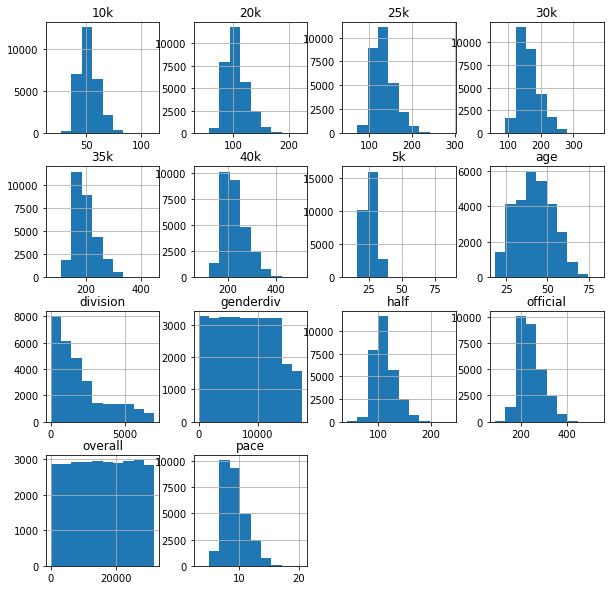

In [13]:
histt = data[columns_numb].hist(figsize=(10, 10))

Tuổi những người tham gia tập trung từ 25 đến 52 tuổi, devision tập trung nhiều ở những người có rank từ 1 đến 2500,...

Overall và genderdiv giá trị phân bố đều, không tập trung vào khoảng nào cụ thể, riêng genderdiv, số lượng người tham gia có genderdiv trên 1300 ít hơn 1 nửa so với các khoảng còn lại.

Dữ liệu chứa 1 số outlier, sử dụng IQR để remove outlier.

In [0]:
q1 = data[columns_numb].quantile(0.25)

q3 = data[columns_numb].quantile(0.75)

cut_off = 1.5 * (q3 - q1)

lower_range, upper_range = q1 - cut_off, q3 + cut_off
for column in columns_numb:
  data = data[(data[column] > lower_range[column]) & (data[column] < upper_range[column])]

In [15]:
data.shape

(27358, 19)

Dữ liệu còn 27358 dòng và 19 cột.

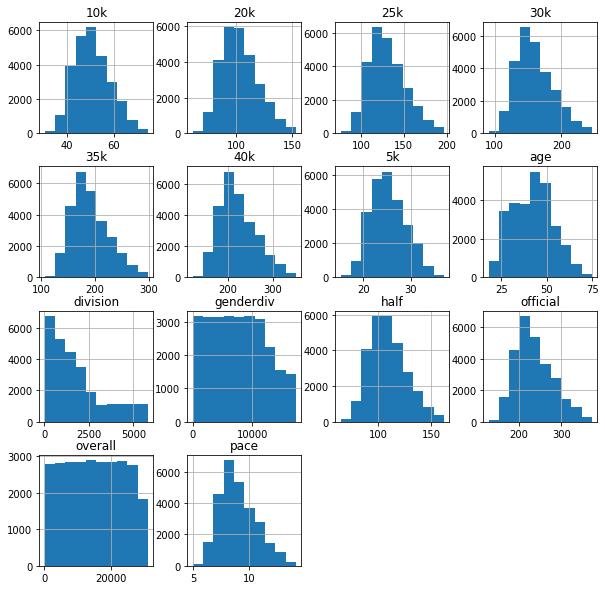

In [16]:
histt = data.hist(figsize=(10, 10))

Các outlier đã được loại bỏ.

So sánh thời gian chạy của nam và nữ.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


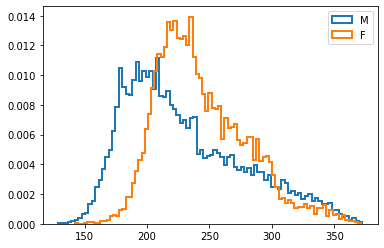

In [17]:
plt.hist(data[data.gender == 'M'].official, 90,normed=1, histtype='step', lw=2, label="M")
plt.hist(data[data.gender == 'F'].official, 90,normed=1, histtype='step', lw=2, label="F")
plt.legend()
plt.show()

Nam có thời gian hoàn thành cuộc đua sớm hơn nữ -> nhóm có nhiều nam sẽ có thời gian chạy trung bình nhanh hơn nhóm có nhiều nữ.

#### Add features

Tại mỗi chặng đua, vận động viên có thể có tốc độ khác nhau, ta sẽ thêm feature speed tại mỗi chặng đua.

In [0]:
data_org = data.copy()

In [0]:
columns_distance = ['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half']
distance = [5, 10, 20, 25, 30, 35, 40 ,50]

In [0]:
for column, dis in zip(columns_distance, distance):
  data[column + '_speed'] = dis/data[column]

In [21]:
data.head()

,10k,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k,5k_speed,10k_speed,20k_speed,25k_speed,30k_speed,35k_speed,40k_speed,half_speed
9,30.48,20,77.68,M,31,137.83,6,20,112.27,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83,0.330033,0.328084,0.323729,0.321833,0.316522,0.311748,0.308095,0.766518
15,33.93,10,85.03,F,30,143.90,F8,10,119.68,46,5.50,MI,102.40,16.92,71.68,67.92,USA,Rochester Hills,136.47,0.295508,0.294724,0.294464,0.294014,0.292969,0.292447,0.293105,0.697545
34,32.57,7,82.43,F,32,142.03,F17,7,116.63,37,5.43,OR,99.33,16.20,69.45,65.82,USA,Portland,134.00,0.308642,0.307031,0.303859,0.303288,0.302024,0.300094,0.298507,0.719942
37,30.52,16,77.58,M,35,136.10,18,16,110.90,16,5.20,AZ,93.82,15.17,65.28,61.83,USA,Tucson,128.17,0.329598,0.327654,0.323468,0.322248,0.319761,0.315600,0.312086,0.765931
39,30.48,1,76.00,M,38,128.62,19,1,106.62,1,4.92,CA,91.17,15.15,64.35,61.08,USA,San Diego,121.82,0.330033,0.328084,0.327439,0.328947,0.329056,0.328269,0.328353,0.777001


Dữ liệu đã có thêm tốc độ tại mỗi chặng đua.

#### Category feature

Convert category feature to onehot encoding.

In [22]:
for column in columns_categories:
  print(column, ':  ', len(data[column].unique()))

gender :   2
bib :   27358
state :   68
country :   2
city :   4582


2 feature bib và city có quá nhiều giá trị unique nên ta sẽ loại bỏ nó.

In [0]:
data.drop(columns=['bib', 'city'], inplace=True)

In [0]:
columns_categories = ['gender', 'state', 'country']

In [0]:
for column in columns_categories:
    dfDummies = pd.get_dummies(data[column], prefix = column)
    data = pd.concat([data, dfDummies], axis=1)

In [0]:
data.drop(columns=columns_categories, inplace=True)

In [27]:
data.head()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,5k_speed,10k_speed,20k_speed,25k_speed,30k_speed,35k_speed,40k_speed,half_speed,gender_F,gender_M,state_AA,state_AB,state_AE,state_AK,state_AL,state_AP,state_AR,state_AZ,state_BC,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_GU,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MB,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NB,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NL,state_NM,state_NS,state_NT,state_NV,state_NY,state_OH,state_OK,state_ON,state_OR,state_PA,state_PE,state_PR,state_QC,state_RI,state_SC,state_SD,state_SK,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,state_YT,country_CAN,country_USA
9,30.48,20,77.68,31,137.83,20,112.27,20,5.27,94.78,15.15,65.23,61.78,129.83,0.330033,0.328084,0.323729,0.321833,0.316522,0.311748,0.308095,0.766518,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15,33.93,10,85.03,30,143.90,10,119.68,46,5.50,102.40,16.92,71.68,67.92,136.47,0.295508,0.294724,0.294464,0.294014,0.292969,0.292447,0.293105,0.697545,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
34,32.57,7,82.43,32,142.03,7,116.63,37,5.43,99.33,16.20,69.45,65.82,134.00,0.308642,0.307031,0.303859,0.303288,0.302024,0.300094,0.298507,0.719942,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
37,30.52,16,77.58,35,136.10,16,110.90,16,5.20,93.82,15.17,65.28,61.83,128.17,0.329598,0.327654,0.323468,0.322248,0.319761,0.315600,0.312086,0.765931,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
39,30.48,1,76.00,38,128.62,1,106.62,1,4.92,91.17,15.15,64.35,61.08,121.82,0.330033,0.328084,0.327439,0.328947,0.329056,0.328269,0.328353,0.777001,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
data.shape

(27358, 94)

Dữ liệu bây giờ gồm 27358 hàng và 94 cột.

# KMeans

Thử số lượng cluster từ 1 đến 9, so sánh khoảng cách từ center đến các điểm của 1 cluster để tìm số lượng cluster tốt nhất.

In [0]:
distortions = [] 
K = range(1,10) 

for k in K: 
	#Building and fitting the model 
	kmeanModel = KMeans(n_clusters=k).fit(data) 
	kmeanModel.fit(data)	 
	distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_, 
					'euclidean'),axis=1)) / data.shape[0]) 

In [30]:
for idx, dis in enumerate(distortions):
  print(idx, ': ', dis)

0 :  8879.650055182035
1 :  4994.155317237372
2 :  3789.6517948586884
3 :  3230.530148781848
4 :  2915.6993523336596
5 :  2709.3497639789002
6 :  2500.846136751032
7 :  2311.8683131789076
8 :  2204.4488317825376


Khoảng cách từ center đến các điểm thuộc 1 cluster giảm dần khi k tăng ---> Số lượng cluster càng lớn thì khoảng cách từ center đến các kiểm của nhóm đó càng giảm. 

Từ 1 đến 4, khi số lượng cluster tăng thêm 1 thì khoảng cách từ center đến các điểm thuộc cluster đó giảm mạnh.

Từ 4 đến 9, khi tăng số lượng cluster thì khoảng cách từ center đến các điểm thuộc cluster đó giảm không nhiều.

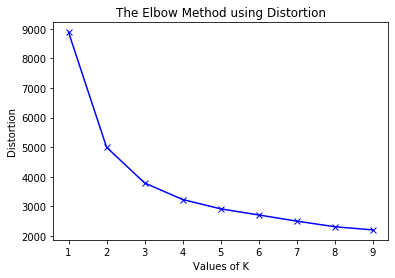

In [31]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

Từ k = 4 trở lên, khoảng cách trung bình giữa center đến các điểm thuộc 1 cluster giảm không nhiều nên sẽ chọn số lượng cluster = 4.

In [0]:
best_cluster_pred = KMeans(n_clusters=4, random_state=42).fit_predict(data)

Kiểm tra số lượng vận động viên phân bố thuộc các nhóm.

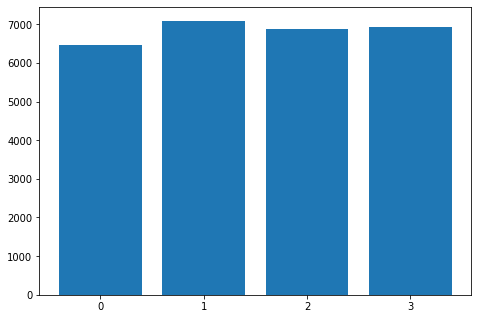

In [33]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cluster = ['0', '1', '2', '3']
ax.bar(cluster, np.bincount(best_cluster_pred))
plt.show()

Số lượng vận động viên được phân vào các nhóm là tương đối đồng đều.

Add feature cluster vào data.

In [34]:
data_org['cluster'] = best_cluster_pred
data_org.head()

,10k,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k,cluster
9,30.48,20,77.68,M,31,137.83,6,20,112.27,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83,3
15,33.93,10,85.03,F,30,143.90,F8,10,119.68,46,5.50,MI,102.40,16.92,71.68,67.92,USA,Rochester Hills,136.47,3
34,32.57,7,82.43,F,32,142.03,F17,7,116.63,37,5.43,OR,99.33,16.20,69.45,65.82,USA,Portland,134.00,3
37,30.52,16,77.58,M,35,136.10,18,16,110.90,16,5.20,AZ,93.82,15.17,65.28,61.83,USA,Tucson,128.17,3
39,30.48,1,76.00,M,38,128.62,19,1,106.62,1,4.92,CA,91.17,15.15,64.35,61.08,USA,San Diego,121.82,3


### Gender

In [0]:
gender_female = []
gender_male = []

for i in range(4):
  cluster = data_org[best_cluster_pred == i]
  gender_female.append(len(cluster[cluster.gender == 'F']))
  gender_male.append(len(cluster[cluster.gender == 'M']))

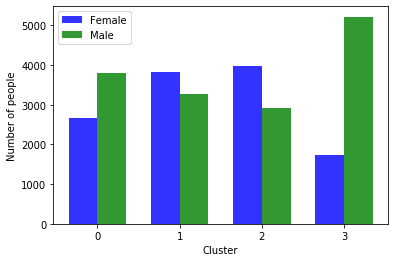

In [36]:
index = np.array([0, 1, 2, 3])

rects1 = plt.bar(index, gender_female, 0.35, alpha=0.8, color='b', label='Female')

rects1 = plt.bar(index + 0.35, gender_male, 0.35, alpha=0.8, color='g', label='Male')

plt.xlabel('Cluster')
plt.ylabel('Number of people')
plt.xticks(index + 0.35/2, ('0', '1', '2', '3'))
plt.legend()

plt.show()

Số lượng nữ ở nhóm 1, 2, nhiều hơn số lượng nam.

Số lương nam ở nhóm 0, 3 nhiều hơn nữ, đặc biệt nhóm 3 có số lượng nam gấp 3 lần số lượng nữ.

### Age

Chia tuổi thành 3 nhóm:

- Từ 18 đến 25.

- Từ 26 đến 40.

- Trên 40.

In [0]:
def age_group(x):
  if x <= 25:
    return 0
  if x <= 40:
    return 1
  return 2

In [0]:
data_org['Age_group'] = data_org.age.apply(lambda x: age_group(x))

In [0]:
age_group_0 = []
age_group_1 = []
age_group_2 = []

for i in range(4):
  cluster = data_org[best_cluster_pred == i]
  age_group_0.append(len(cluster[cluster.Age_group == 0]))
  age_group_1.append(len(cluster[cluster.Age_group == 1]))
  age_group_2.append(len(cluster[cluster.Age_group == 2]))


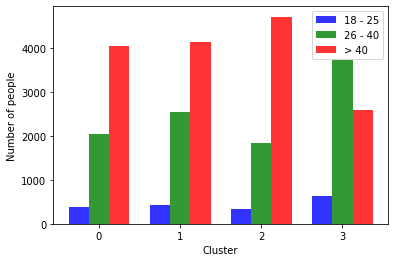

In [40]:
index = np.array([0, 1, 2, 3])

rects1 = plt.bar(index, age_group_0, 0.25, alpha=0.8, color='b', label='18 - 25')

rects1 = plt.bar(index + 0.25, age_group_1, 0.25, alpha=0.8, color='g', label='26 - 40')

rects1 = plt.bar(index + 0.25*2, age_group_2, 0.25, alpha=0.8, color='r', label='> 40')

plt.xlabel('Cluster')
plt.ylabel('Number of people')
plt.xticks(index + 0.25, ('0', '1', '2', '3'))
plt.legend()

plt.show()

Số lượng những người dưới 25 tuổi ở tất cả 4 nhóm đều nhỏ hơn nhiều so với các nhóm tuổi còn lại.

Số lượng những người trên 40 tuổi ở nhóm 0, 1, 2 cao hơn nhất so với các lứa tuổi khác, đặc biệt nhóm 0 có số lượng người trên 40 tuổi gấp hơn 2 lần số người từ 26 - 40, nhóm 2 số người trên 40 tuổi gần gấp 3 lần số người từ 26 - 40.

Nhóm 3 là nhóm duy nhất có số người trông độ tuổi từ 26 đến 40 chiến tỷ lệ cao nhất, lớn hơn tổng số ngươi dưới 25 và trên 40 tuổi cộng lại.

### Official time

In [0]:
import seaborn as sns

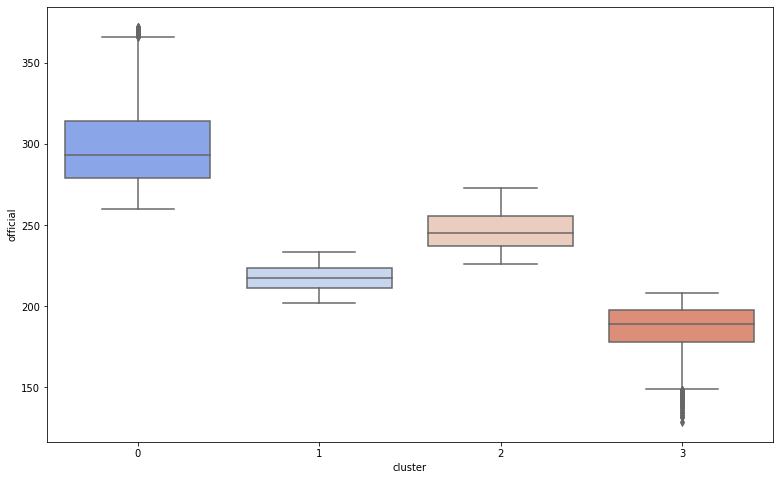

In [42]:
g = sns.boxplot(data_org['cluster'], data.official, palette="coolwarm")
g.figure.set_size_inches(13,8)

Nhóm 3 là nhóm có thời gian chạy nhanh nhất do số lượng nam nhiều hơn số lượng nữ và độ tuổi trong khoảng từ 26 đến 40 chiếm tỷ lệ cao, sau đó đến nhóm 1, theo sau là nhóm 2.

Nhóm 0 có thời gian chạy lâu nhất do có nhiều người trên 40 tuổi và số lượng nữ chiếm tỷ lệ lớn.

# KMeans with PCA

Chọn số chiều để sử dụng PCA.

In [43]:
pca = PCA(n_components=93)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=93, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

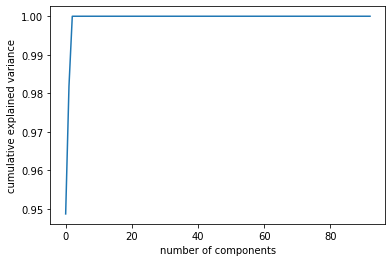

In [44]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [45]:
n_dims = np.min(np.where(np.cumsum(pca.explained_variance_ratio_) > 0.99))
print('dim = ', n_dims)

dim =  2


Chọn số chiều sau khi sử dụng PCA là 2.

In [46]:
pca = PCA(n_dims)
data_pca = pca.fit_transform(data)
data_pca.shape

(27358, 2)

So sánh khoảng cách từ center tới các điểm thuộc cùng 1 cluster so với không sử dụng PCA.

In [0]:
distortions = [] 
K = range(1,10) 

for k in K: 
	#Building and fitting the model 
	kmeanModel = KMeans(n_clusters=k).fit(data_pca) 
	kmeanModel.fit(data_pca)	 
	distortions.append(sum(np.min(cdist(data_pca, kmeanModel.cluster_centers_, 
					'euclidean'),axis=1)) / data_pca.shape[0]) 
 

In [48]:
for idx, dis in enumerate(distortions):
  print(idx, ': ', dis)

0 :  8743.493651516686
1 :  4770.251028211284
2 :  3514.9367619126047
3 :  2928.332391358775
4 :  2588.9987210690015
5 :  2362.374450863699
6 :  2113.3023571396634
7 :  1895.6209903513575
8 :  1772.4031801232563


Khi sử dụng PCA cho sự thay đổi không đáng kể, số cluster 6, 7, 8 khi sử dụng PCA cho khoảng cách thấp hơn khi không sử dụng PCA.

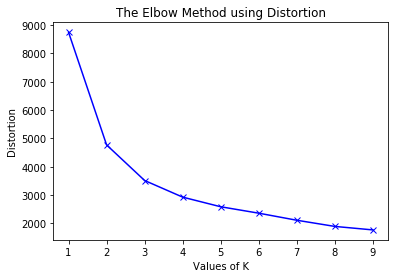

In [49]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

Tương tự với không sử dụng PCA, số cluster bằng 4 là tốt nhât.

In [0]:
best_cluster_pred = KMeans(n_clusters=4, random_state=42).fit_predict(data_pca)

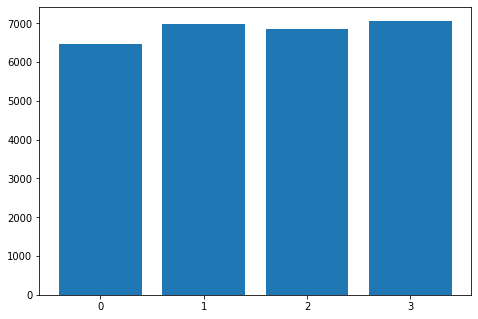

In [51]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cluster = ['0', '1', '2', '3']
ax.bar(cluster, np.bincount(best_cluster_pred))
plt.show()

Số lượng vận động viên mỗi class cũng khá đồng đều.

In [0]:
data_org['cluster_pca'] = best_cluster_pred

## Gender

In [0]:
gender_female_pca = []
gender_male_pca = []

for i in range(4):
  cluster = data_org[best_cluster_pred == i]
  gender_female_pca.append(len(cluster[cluster.gender == 'F']))
  gender_male_pca.append(len(cluster[cluster.gender == 'M']))

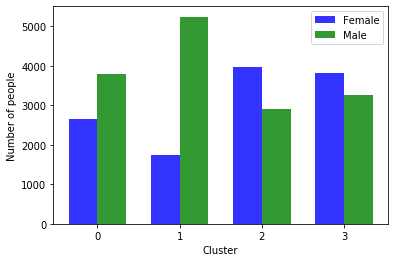

In [54]:
index = np.array([0, 1, 2, 3])

rects1 = plt.bar(index, gender_female_pca, 0.35, alpha=0.8, color='b', label='Female')

rects1 = plt.bar(index + 0.35, gender_male_pca, 0.35, alpha=0.8, color='g', label='Male')

plt.xlabel('Cluster')
plt.ylabel('Number of people')
plt.xticks(index + 0.35/2, ('0', '1', '2', '3'))
plt.legend()

plt.show()

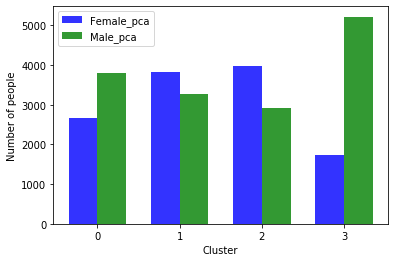

In [55]:
index = np.array([0, 1, 2, 3])

rects1 = plt.bar(index, gender_female, 0.35, alpha=0.8, color='b', label='Female_pca')

rects1 = plt.bar(index + 0.35, gender_male, 0.35, alpha=0.8, color='g', label='Male_pca')

plt.xlabel('Cluster')
plt.ylabel('Number of people')
plt.xticks(index + 0.35/2, ('0', '1', '2', '3'))
plt.legend()

plt.show()

Sau khi sử dụng PCA, đối với số lượng nam và nữ của từng nhóm không khác nhiều so với không sử dụng PCA, chỉ thay đổi vị trí nhóm.

## Age

In [0]:
age_group_0_pca = []
age_group_1_pca = []
age_group_2_pca = []

for i in range(4):
  cluster = data_org[best_cluster_pred == i]
  age_group_0_pca.append(len(cluster[cluster.Age_group == 0]))
  age_group_1_pca.append(len(cluster[cluster.Age_group == 1]))
  age_group_2_pca.append(len(cluster[cluster.Age_group == 2]))


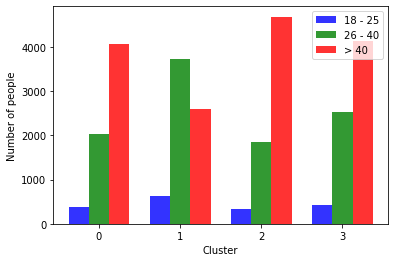

In [57]:
index = np.array([0, 1, 2, 3])

rects1 = plt.bar(index, age_group_0_pca, 0.25, alpha=0.8, color='b', label='18 - 25')

rects1 = plt.bar(index + 0.25, age_group_1_pca, 0.25, alpha=0.8, color='g', label='26 - 40')

rects1 = plt.bar(index + 0.25*2, age_group_2_pca, 0.25, alpha=0.8, color='r', label='> 40')

plt.xlabel('Cluster')
plt.ylabel('Number of people')
plt.xticks(index + 0.25, ('0', '1', '2', '3'))
plt.legend()

plt.show()

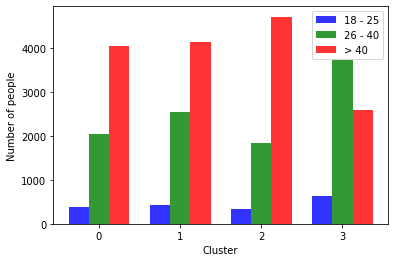

In [58]:
index = np.array([0, 1, 2, 3])

rects1 = plt.bar(index, age_group_0, 0.25, alpha=0.8, color='b', label='18 - 25')

rects1 = plt.bar(index + 0.25, age_group_1, 0.25, alpha=0.8, color='g', label='26 - 40')

rects1 = plt.bar(index + 0.25*2, age_group_2, 0.25, alpha=0.8, color='r', label='> 40')

plt.xlabel('Cluster')
plt.ylabel('Number of people')
plt.xticks(index + 0.25, ('0', '1', '2', '3'))
plt.legend()

plt.show()

Về độ tuổi giữa các nhóm cũng không khác biệt so với không sử dụng PCA.

## Official time

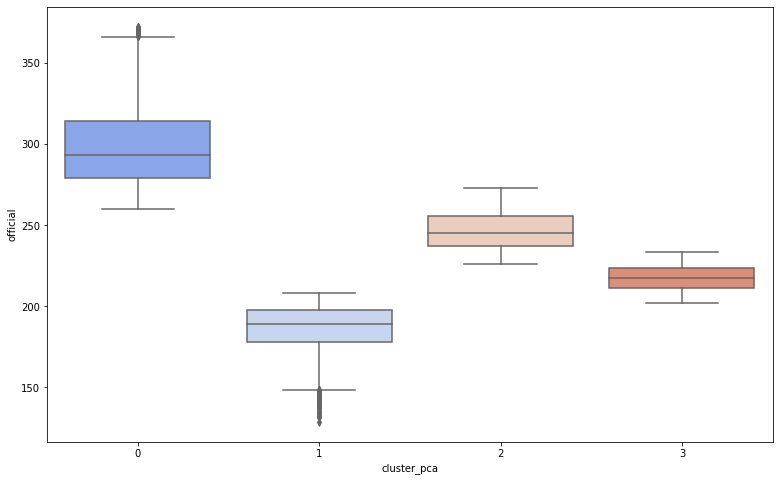

In [59]:
g = sns.boxplot(data_org['cluster_pca'], data.official, palette="coolwarm")
g.figure.set_size_inches(13,8)

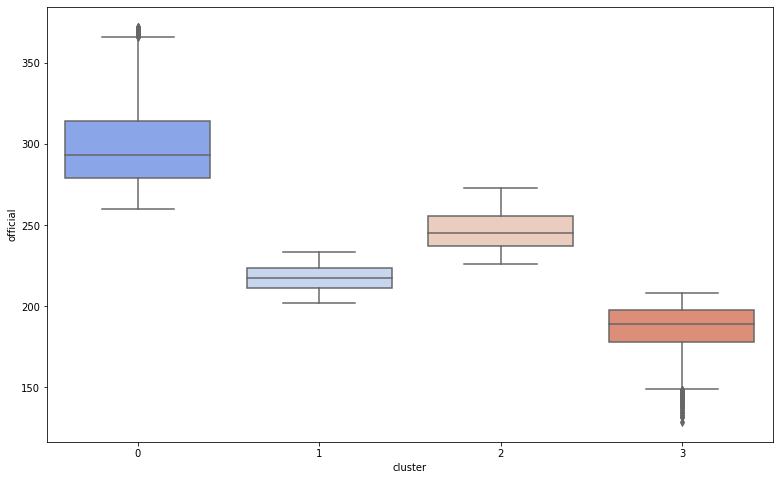

In [60]:
g = sns.boxplot(data_org['cluster'], data.official, palette="coolwarm")
g.figure.set_size_inches(13,8)

Các nhóm được chia ra có thời gian chạy tương tự như không sử dụng PCA. 

# Conclusions

KMeans chia dữ liệu thành 4 nhóm.

Nhóm 1 chạy nhanh nhất do số lượng nam nhiều gấp 3 lần so với số lượng nữ, các nhóm khác có số lượng nữ cao hơn nam. Hơn nữa nhóm 1 có độ tuổi tập trung từ 26 đến 40 tuổi cao hơn các độ tuổi khác, ngược lại các nhóm còn lại có số người từ 26 đến 40 tuổi lại thấp hơn, đặc biệt nhóm 2 có số lượng người trên 40 tuổi lớn nhất.

Tuy nhóm 1 có số lượng người trẻ tuổi nhiều hơn nhóm 2 và nhóm 3, số lượng người cao tuổi ít hơn nhóm 2 và nhóm 3 nhưng lại có thời gian chạy lâu nhất.

PCA không cho tác dụng nhiều đối với KMneas.